In [1]:
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
img = Image.open(rf'C:\Users\HirokiFuruyama\analysis\va_2021\figure\spectrogram_png\train\spectrogram1.png')

In [12]:
img_array = np.array(img)

In [87]:
trans = transforms.Compose([transforms.ToTensor(),
#                     transforms.Normalize(0, 1, True)
                           ])

In [88]:
trans_data = trans(img)

In [89]:
print(trans_data.mean())
print(trans_data.std())

tensor(0.4256)
tensor(0.2575)


In [90]:
x = trans_data.to('cpu').detach().numpy().copy()

(array([2727.,  102.,  379.,  838., 1286., 1776., 1791., 1531., 1291.,
        1267., 1226., 1101.,  759.,  275.,   35.]),
 array([0.        , 0.06666667, 0.13333334, 0.2       , 0.26666668,
        0.33333334, 0.4       , 0.46666667, 0.53333336, 0.6       ,
        0.6666667 , 0.73333335, 0.8       , 0.8666667 , 0.93333334,
        1.        ], dtype=float32),
 <BarContainer object of 15 artists>)

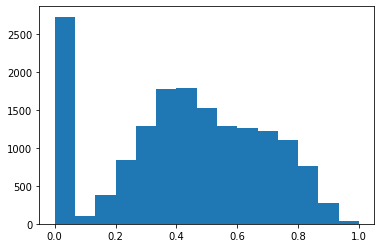

In [91]:
plt.hist(x.flatten(),bins=15)

(array([2727.,  102.,  379.,  838., 1286., 1776., 1791., 1531., 1291.,
        1267., 1226., 1101.,  759.,  275.,   35.]),
 array([  0.,  17.,  34.,  51.,  68.,  85., 102., 119., 136., 153., 170.,
        187., 204., 221., 238., 255.]),
 <BarContainer object of 15 artists>)

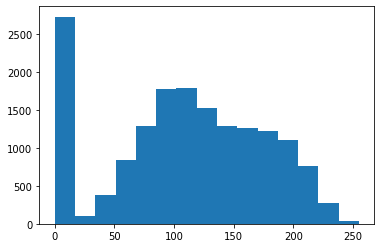

In [25]:
plt.hist(img_array.flatten(),bins=15)

In [36]:
a = min_max(img_array.flatten())

(array([2727.,  102.,  379.,  838., 1286., 1776., 1791., 1531., 1291.,
        1267., 1226., 1101.,  759.,  275.,   35.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

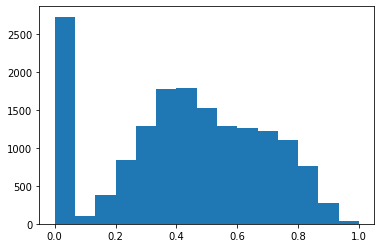

In [37]:
plt.hist(a,bins=15)

(array([2729.,  109.,  407.,  861., 1333., 1790., 1768., 1509., 1296.,
        1252., 1160., 1101.,  789.,  249.,   31.]),
 array([-0.32653048, -0.19706347, -0.06759647,  0.06187053,  0.19133754,
         0.32080454,  0.45027154,  0.57973854,  0.70920555,  0.83867255,
         0.96813955,  1.09760655,  1.22707356,  1.35654056,  1.48600756,
         1.61547456]),
 <BarContainer object of 15 artists>)

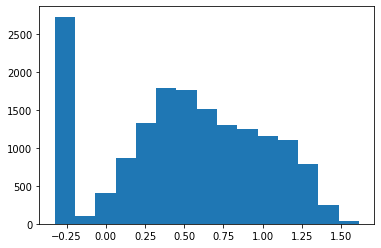

In [38]:
plt.hist(zscore(a), bins=15)

In [35]:
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

def zscore(x, axis = None):
    _std = 0.5
    _mean = 0.5
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd * _std +_mean
    return zscore

In [260]:
x = np.random.randint(0, 255, (1, 100)).flatten()

In [261]:
x_nor = min_max(x)

In [262]:
x_z = zscore(x_nor)

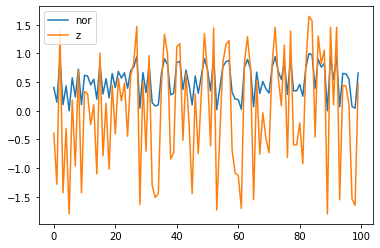

In [263]:
# plt.plot(x)
plt.plot(x_nor, label='nor')
plt.plot(x_z, label='z')
plt.legend()

In [264]:
x_nor.std()

0.2899522662516359

In [265]:
x_z.mean()

1.8485213360008857e-16

In [266]:
x_z.std()

1.0

In [267]:
x_z.max()

1.649696826022427

In [268]:
x_z.min()

-1.7991467127004164

In [14]:
img_path = rf'C:\Users\HirokiFuruyama\analysis\kaggle\cassava\data\train_images\*jpg'

label = pd.read_csv(rf'C:\Users\HirokiFuruyama\analysis\kaggle\cassava\data\train.csv')
path_list = glob.glob(img_path)

In [15]:
path_list.sort()

In [20]:
path_list[-2]

'C:\\Users\\HirokiFuruyama\\analysis\\kaggle\\cassava\\data\\train_images\\999616605.jpg'

In [18]:
label.tail()

,image_id,label
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4
21396,999998473.jpg,4


In [5]:
len(label)

21397

In [12]:
set(label['image_id'][0])-'.jpg'

TypeError: unsupported operand type(s) for -: 'set' and 'str'

In [1]:
import random

In [9]:
aa = [0,1,2]

In [10]:
nums = [0, 1, 2, 3, 4]
random.seed(0)  # これで乱数を固定しています。

random.shuffle(nums)
print(f'シャッフル1回目：{nums}')

random.shuffle(nums)
print(f'シャッフル2回目：{nums}')

random.shuffle(nums)
print(f'シャッフル3回目：{nums}')

シャッフル1回目：[2, 1, 0, 4, 3]
シャッフル2回目：[2, 0, 1, 4, 3]
シャッフル3回目：[0, 2, 3, 1, 4]


In [11]:
random.shuffle(aa)

In [15]:
import random
x = [1,2,3,4]
y = [11,12,13,14]
p = list(zip(x, y))
random.shuffle(p)
x, y = zip(*p)

In [37]:
a = [0,1,2]
b = [3,4,5]
p = list(zip(a,b))
random.shuffle(p)
c,d = zip(*p)

In [40]:
class SampleIterator(object):
    def __init__(self, num):
        self.num = num
        self.current = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current == self.num:
            raise StopIteration()

        ret = self.current
        self.current += 1
        return ret

In [42]:
si = SampleIterator(3)

In [43]:
for i in si:
    print(i)

0
1
2
